In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import fastf1
import fastf1.plotting

In [7]:
schedule = fastf1.get_event_schedule(2021)


In [8]:
import matplotlib as mpl
year = 2021
wknd = 9
ses = 'R'
driver = 'RIC'
colormap = mpl.cm.plasma

In [9]:
session = fastf1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_driver(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.3.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No c

In [10]:
import numpy as np
#Now, we create a set of line segments so that we can color them individually. This creates the points as a N x 1 x 2 array so that we can stack points together easily to get the segments. The segments array for line collection needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

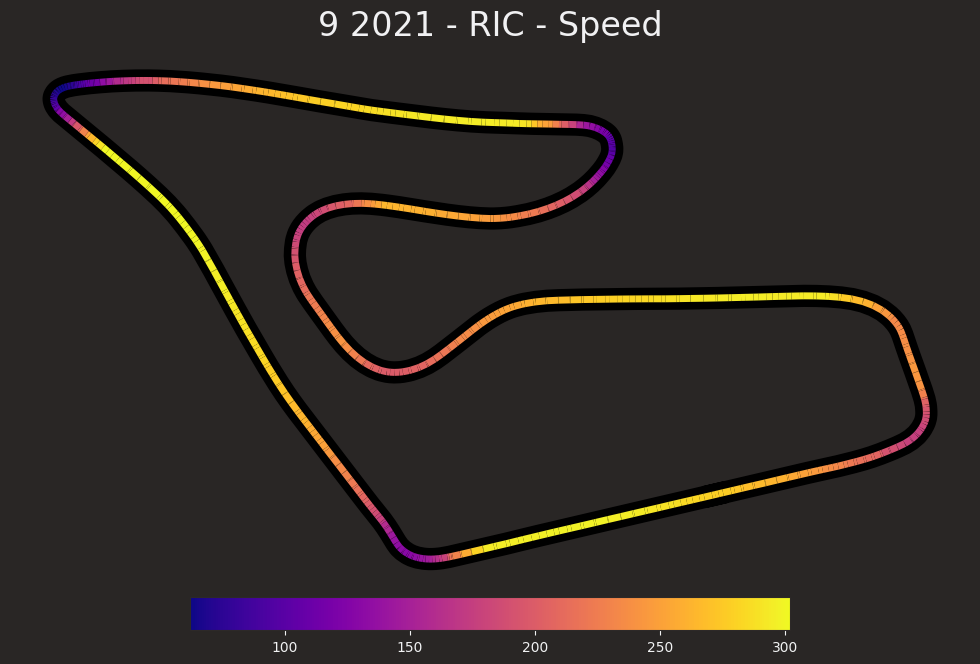

In [12]:
from matplotlib.collections import LineCollection
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
        color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                   orientation="horizontal")


# Show the plot
plt.show()

start coding myself

In [3]:
bahrain=fastf1.get_session(2021,'abu dhabi','r')

req         WARNING 	DEFAULT CACHE ENABLED! (481.2 MB) C:\Users\haryo\AppData\Local\Temp\fastf1


In [4]:
bahrain.load()

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.3.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 9
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 9)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '55', '22', '10',

In [12]:
leclerc=bahrain.laps.pick_driver('HAM').pick_fastest().get_car_data()
verstappen=bahrain.laps.pick_driver('VER').pick_fastest().get_car_data()

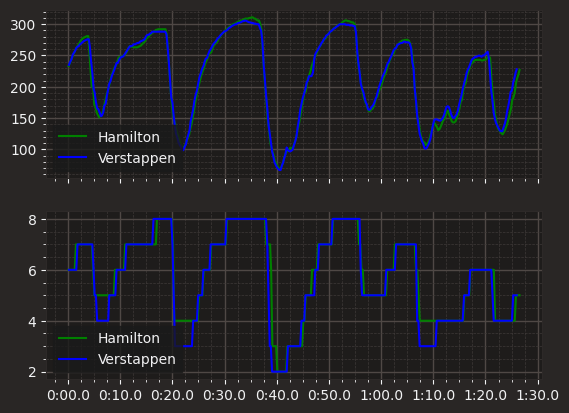

In [21]:
fastf1.plotting.setup_mpl()

fig,axs=plt.subplots(2,sharex=True)
axs[0].plot(leclerc['Time'],leclerc['Speed'],label='Hamilton',color='green')
axs[0].plot(verstappen['Time'],verstappen['Speed'],label='Verstappen',color='blue')
axs[1].plot(leclerc['Time'],leclerc['nGear'],label='Hamilton',color='green')
axs[1].plot(verstappen['Time'],verstappen['nGear'],label='Verstappen',color='blue')
axs[0].legend()
axs[1].legend()

In [56]:
bahrain.get_circuit_info().corners

,X,Y,Number,Letter,Angle,Distance
0,4294.859375,2690.717773,1,,-35.340600,380.143434
1,3848.351318,4987.570801,2,,42.198164,635.854478
2,2206.551025,6155.120117,3,,-163.169332,840.993695
3,2378.656250,8052.805176,4,,-8.298533,1025.977825
4,1839.358276,11771.707031,5,,84.326847,1424.226341
5,-2150.159424,655.311096,6,,-148.988037,2621.820659
6,-1583.492065,587.163330,7,,46.320930,2681.838566
7,-823.991882,-1256.985107,8,,-144.588429,2922.891821
8,5774.805664,-4917.836914,9,,-21.958205,3695.018966
9,3125.774414,-3602.140381,10,,82.890762,4034.616617


In [13]:
bahrain.laps.pick_driver('HAM').telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2021-12-12 13:03:21.881,0 days 01:02:21.871000,,0.000000,0 days 00:00:00,8720,0,1,19,False,1,interpolation,0.009306,3.077176e-08,OnTrack,1425,2178,-240
3,2021-12-12 13:03:21.921,0 days 01:02:21.911000,,0.000000,0 days 00:00:00.040000,8721,0,1,19,False,1,pos,0.006556,2.167824e-08,OnTrack,1425,2178,-240
4,2021-12-12 13:03:21.969,0 days 01:02:21.959000,,0.000000,0 days 00:00:00.088000,8723,0,1,19,False,1,car,0.000000,0.000000e+00,OnTrack,1424,2177,-239
5,2021-12-12 13:03:22.141,0 days 01:02:22.131000,,0.000000,0 days 00:00:00.260000,8553,0,1,19,False,1,pos,-0.035022,-1.158055e-07,OnTrack,1425,2178,-240
6,2021-12-12 13:03:22.209,0 days 01:02:22.199000,,0.000000,0 days 00:00:00.328000,8384,0,1,19,False,1,car,0.000000,0.000000e+00,OnTrack,1425,2178,-240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47419,2021-12-12 14:33:41.370,0 days 02:32:41.360000,55,409.121389,0 days 01:30:19.489000,8225,156,5,0,False,1,car,302397.229722,9.999336e-01,OnTrack,361,2054,-237
47420,2021-12-12 14:33:41.381,0 days 02:32:41.371000,55,408.299167,0 days 01:30:19.500000,8419,154,5,0,False,1,pos,302397.700021,9.999352e-01,OnTrack,367,2055,-238
47421,2021-12-12 14:33:41.601,0 days 02:32:41.591000,55,407.476944,0 days 01:30:19.720000,8613,153,5,0,False,1,pos,302406.986936,9.999659e-01,OnTrack,474,2068,-239
47422,2021-12-12 14:33:41.610,0 days 02:32:41.600000,55,406.654722,0 days 01:30:19.729000,8807,152,5,0,False,1,car,302407.363056,9.999672e-01,OnTrack,478,2068,-239


In [4]:
ham_2021=pd.DataFrame(bahrain.laps).query("Driver in ['HAM','VER']")[['LapTime','Driver','Sector1Time','Sector2Time','Sector3Time','Compound']].melt(id_vars=['Compound','Driver','LapTime'],value_vars=['Sector1Time','Sector2Time','Sector3Time'],var_name='Sectors',value_name='Time')

<Axes: xlabel='Sectors', ylabel='Time'>

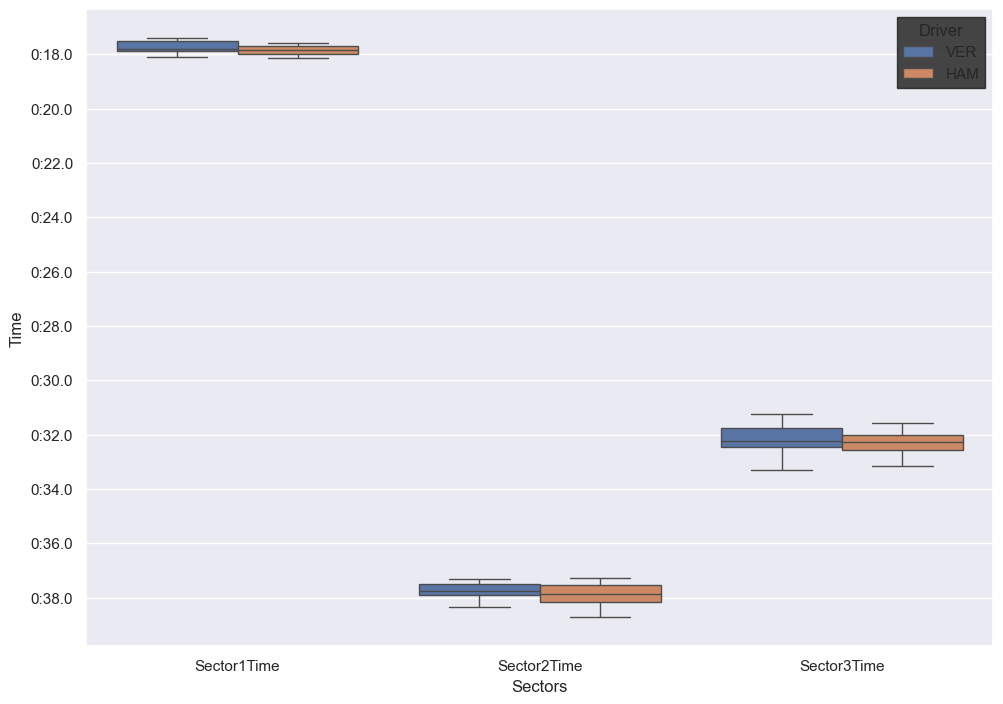

In [68]:
sns.boxplot(data=ham_2021.query('Compound != "SOFT"'),x='Sectors',y='Time',hue='Driver',showfliers=False)

<Axes: xlabel='Compound', ylabel='LapTime'>

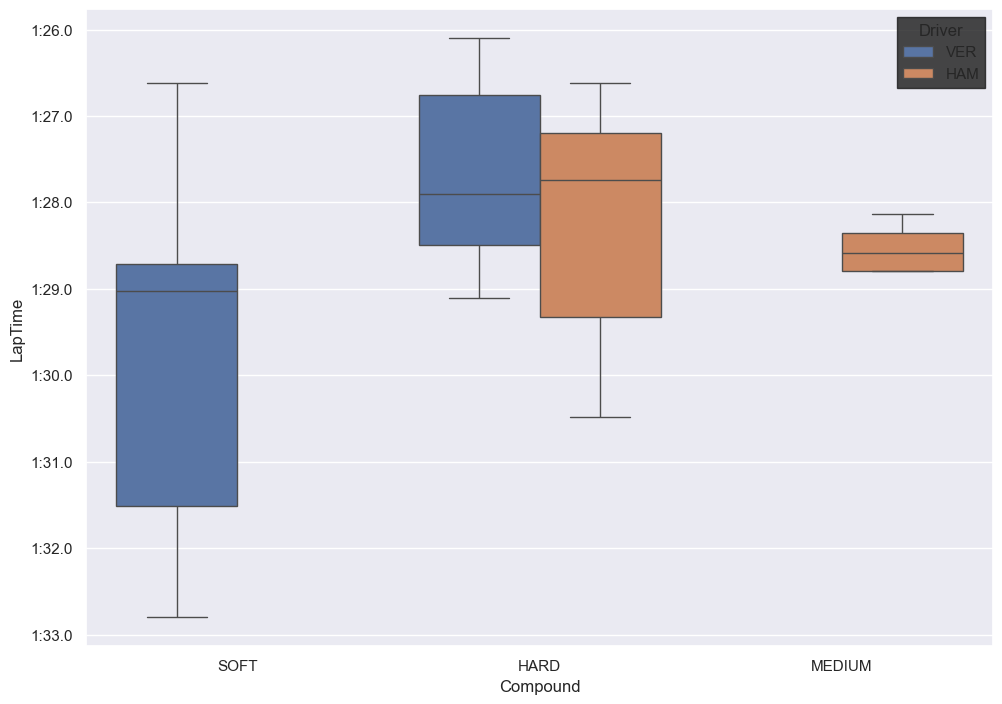

In [75]:
sns.boxplot(data=ham_2021,x='Compound',y='LapTime',hue='Driver',showfliers=False)

<Axes: xlabel='Driver', ylabel='LapTime'>

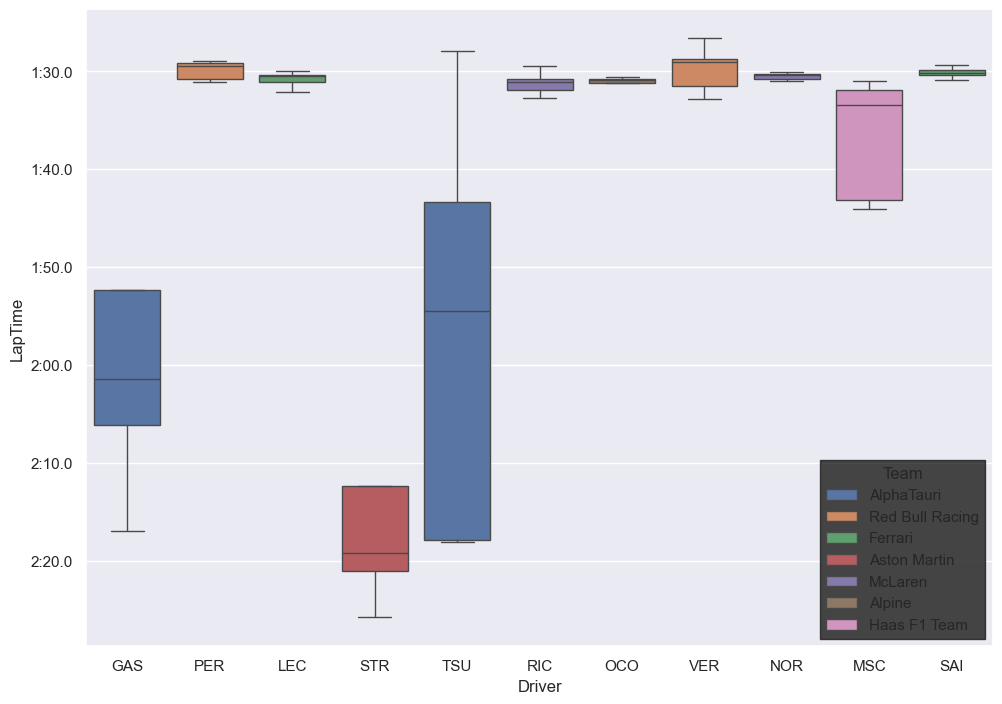

In [60]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=bahrain.laps.query('Compound == "SOFT"'),x='Driver',y='LapTime',hue='Team',showfliers=False)

In [82]:
hamilton_hard=pd.DataFrame()
verstappen_hard=pd.DataFrame()
for i in range(int(max(bahrain.laps.LapNumber)+1)):
    hamilton=pd.DataFrame(bahrain.laps.pick_driver('TSU').pick_tyre('HARD').pick_fastest().get_telemetry())
    
    hamilton['LapNumber']=i
    verstappen=pd.DataFrame(bahrain.laps.pick_driver('SAI').pick_tyre('HARD').pick_fastest().get_telemetry())

    verstappen['LapNumber']=i
    hamilton_hard=pd.concat([hamilton_hard,hamilton])
    verstappen_hard=pd.concat([verstappen_hard,verstappen])



core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

In [83]:
verstappen_hard=verstappen_hard.query("DRS in [0,1,2,3,8]")
hamilton_hard=hamilton_hard.query("DRS in [0,1,2,3,8]")

In [84]:
hamilton_hard['miniSect']=hamilton_hard['RelativeDistance'].apply(lambda x: int(x/(1/25)))
verstappen_hard['miniSect']=verstappen_hard['RelativeDistance'].apply(lambda x: int(x/(1/25)))

In [85]:
hamilton_hard=hamilton_hard[['Speed','miniSect']].groupby('miniSect').mean()
hamilton_hard['drv']='TSU'
hamilton_hard['drv_id']=1
verstappen_hard=verstappen_hard[['Speed','miniSect']].groupby('miniSect').mean()
verstappen_hard['drv']='SAI'
verstappen_hard['drv_id']=2

In [86]:
df=pd.concat([hamilton_hard,verstappen_hard])
df[df.groupby('miniSect')['Speed'].transform(max) == df['Speed']].sort_index()

,Speed,drv,drv_id
miniSect,,,
0,255.076923,TSU,1
1,212.212121,TSU,1
2,208.967742,TSU,1
3,257.269231,TSU,1
4,271.125000,TSU,1
5,285.608696,TSU,1
6,165.878049,SAI,2
7,189.588235,TSU,1
8,267.360000,TSU,1


In [87]:
dfSpeed=df.reset_index().sort_values('Speed').drop_duplicates(subset='miniSect', keep='last').sort_values('miniSect').reset_index(drop=True)

In [ ]:
def assignSector(cell):
    

In [70]:


res=hamilton_hard[['Speed','X','Y','minisect']].merge(verstappen_medium[['Speed','X','Y','miniSect']],on=['LapNumber',''],how='outer',suffixes=['_HAM','_VER'])

C:\Users\haryo\AppData\Local\Temp\ipykernel_20020\522060429.py:2: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  res=hamilton_medium[['Speed','X','Y','Distance']].merge(verstappen_medium[['Speed','X','Y']],on=['X','Y'],how='outer',suffixes=['_HAM','_VER'])


In [71]:
max(bahrain.laps.LapNumber)

58.0

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
from matplotlib.collections import LineCollection

import fastf1


#session = fastf1.get_session(2021, 'Austrian Grand Prix', 'Q')
#session.load()

#lap = session.laps.pick_fastest()
#tel = lap.get_telemetry()

In [89]:
single_lap = pd.DataFrame(bahrain.laps.pick_fastest().get_telemetry())
single_lap['miniSect']=single_lap['RelativeDistance'].apply(lambda x: int(x/(1/25)))
single_lap=single_lap.merge(dfSpeed,on='miniSect')


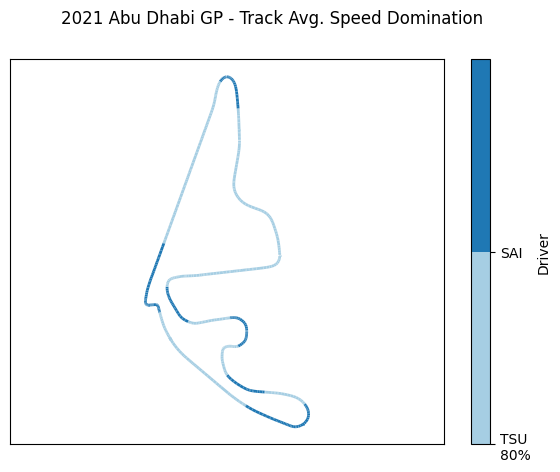

In [101]:
from matplotlib import cm

x = np.array(single_lap['X'].values)
y = np.array(single_lap['Y'].values)



points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_avg=single_lap['drv_id'].to_numpy().astype(float)
#compound = single_lap['Fastest_compound_int'].to_numpy().astype(float)

cmap = colormaps['Paired']
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_avg)
lc_comp.set_linewidth(2)

plt.rcParams['figure.figsize'] = [7, 5]
    

title = plt.suptitle(
        f"2021 Abu Dhabi GP - Track Avg. Speed Domination"
    )
        
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
    

cbar = plt.colorbar(mappable=lc_comp, label='Driver', boundaries=np.arange(1, 4))
cbar.set_ticks(np.arange(1,3))
cbar.set_ticklabels(['TSU\n80%', 'SAI'])
    

plt.show()

In [41]:
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)

In [42]:
cmap = colormaps['Paired']
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

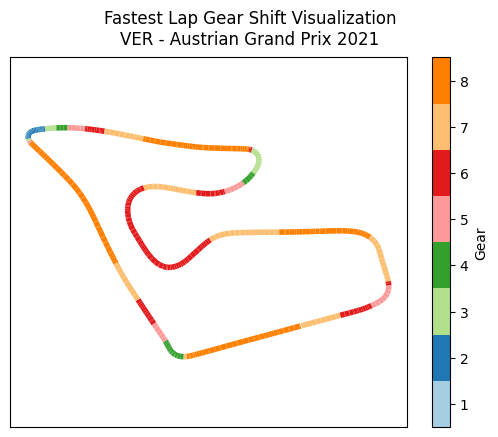

In [43]:
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)
cbar = plt.colorbar(mappable=lc_comp, label="Gear",
                    boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))

plt.show()